In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 12, 8

In [90]:
eledf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Electric_Production.csv")

In [91]:
eledf.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [92]:
eledf.tail()

,DATE,IPG2211A2N
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212
396,1/1/2018,129.4048


In [93]:
print(f"The shape of the dataframe is: {eledf.shape}, with the columns as: {list(eledf.columns)}")

The shape of the dataframe is: (397, 2), with the columns as: ['DATE', 'IPG2211A2N']


In [94]:
eledf['DATE'] = pd.to_datetime(eledf['DATE'], infer_datetime_format=True)
eledf.columns = ['DATE', 'Units']
eledf.head()

,DATE,Units
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [95]:
print(f"Electricty units from the date: {eledf.loc[:,'DATE'][0]} to {eledf.loc[:,'DATE'][len(eledf)-1]}")

Electricty units from the date: 1985-01-01 00:00:00 to 2018-01-01 00:00:00


In [96]:
print(f"Maximum electrcicty consumption throughout the years is: {max(eledf['Units'])} units, and minimum consumption is: {min(eledf['Units'])} units.")

Maximum electrcicty consumption throughout the years is: 129.4048 units, and minimum consumption is: 55.3151 units.


In [97]:
eledf.describe()

,Units
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [98]:
eledf.set_index("DATE", inplace=True)

In [99]:
eledf.head()

,Units
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


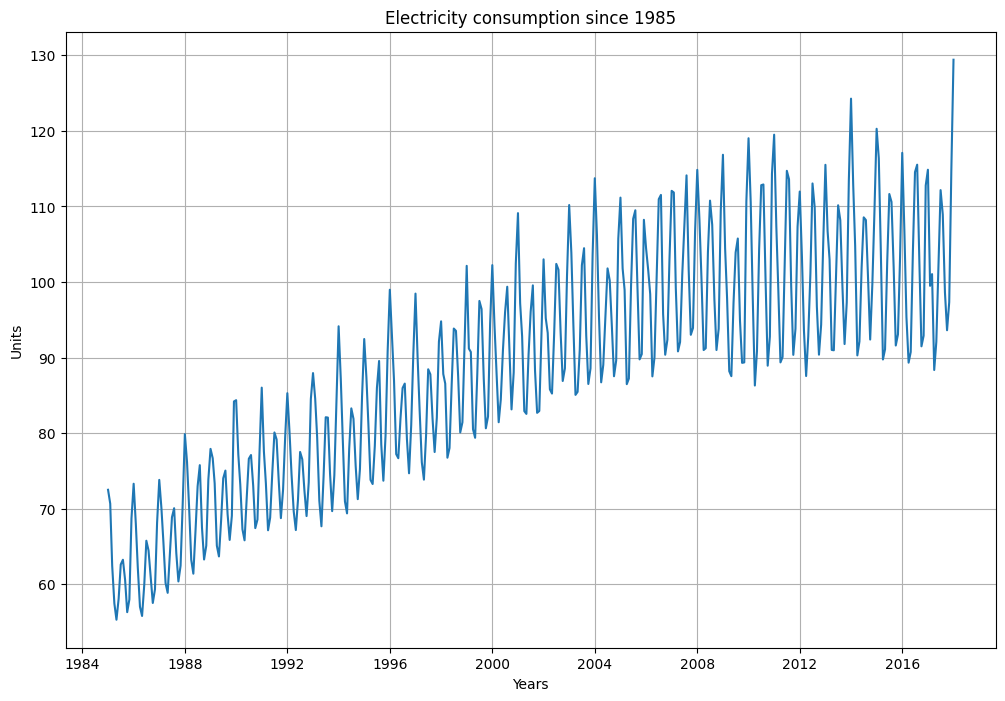

In [100]:
# Standard plotting of the values

plt.title("Electricity consumption since 1985")
plt.xlabel("Years")
plt.ylabel("Units")
plt.plot(eledf, linestyle='-')
plt.grid()

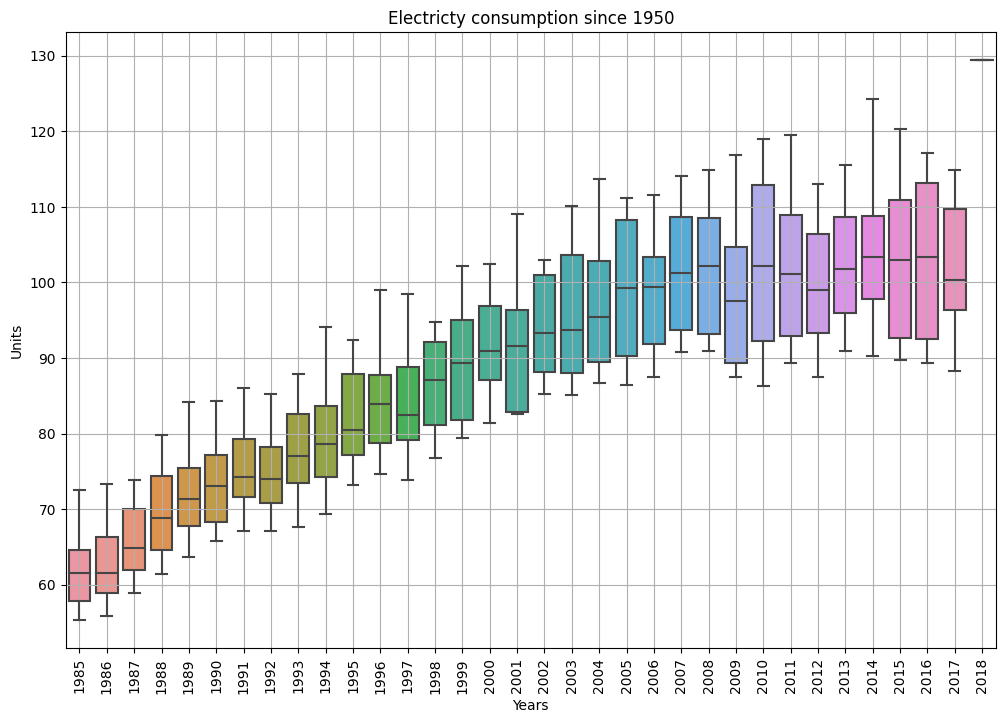

In [101]:
# Boxplotting of the values

fig, ax = plt.subplots()
sns.boxplot(x=eledf.index.year, y=eledf["Units"], ax=ax)
plt.title("Electricty consumption since 1950")
plt.xlabel("Years")
plt.ylabel("Units")
plt.xticks(rotation=90)
plt.grid()

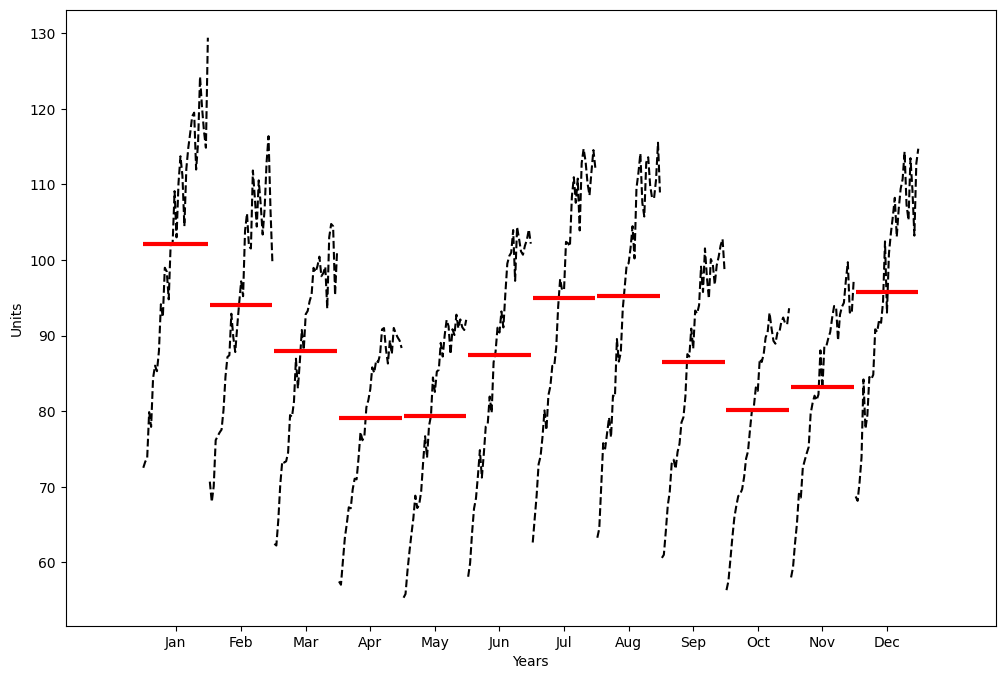

In [102]:

from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots()
month_plot(eledf, ylabel = 'Electricity consumption', ax=ax)
plt.xlabel("Years")
plt.ylabel("Units")

for line in ax.lines:
    line.set_linestyle('--')

plt.show()

In [103]:
def resample(df, t, trend=None, xl=None):
  df_new = df.resample(t).mean()
  df_new.plot()
  plt.title(f"Average electricty consumption {trend} since 1985")
  plt.xlabel(xl)
  plt.ylabel("Units")
  plt.legend(loc='upper left')
  plt.grid(True, linestyle='--')
  plt.show()

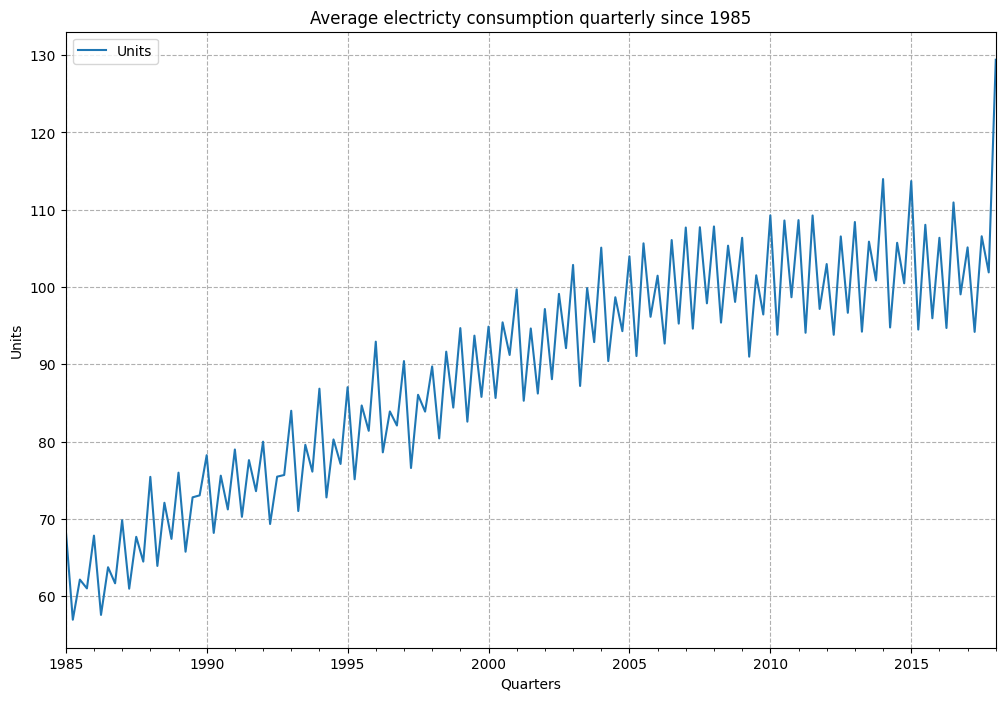

In [104]:
resample(eledf, 'Q', "quarterly", "Quarters")

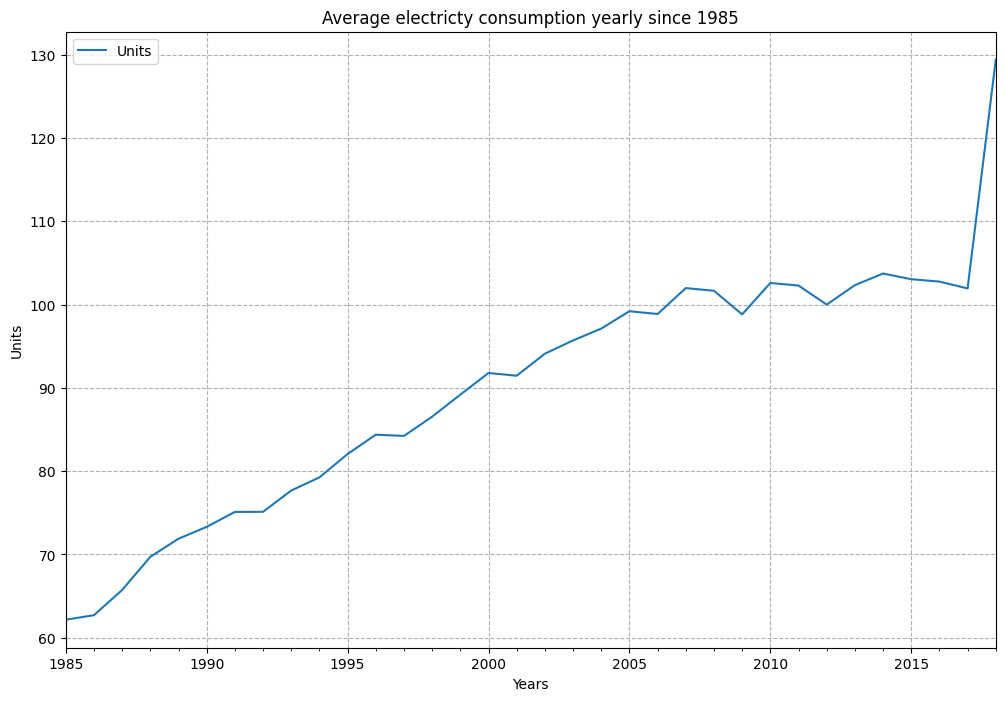

In [105]:
resample(eledf, 'A', "yearly", "Years")

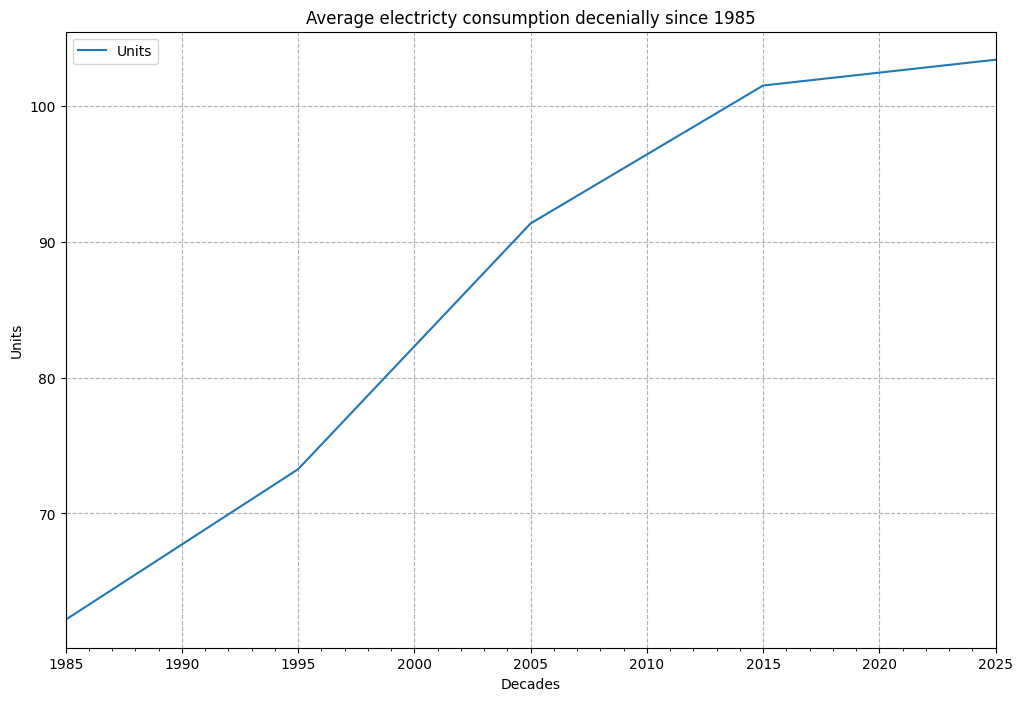

In [106]:
resample(eledf, '10Y', "decenially", "Decades")

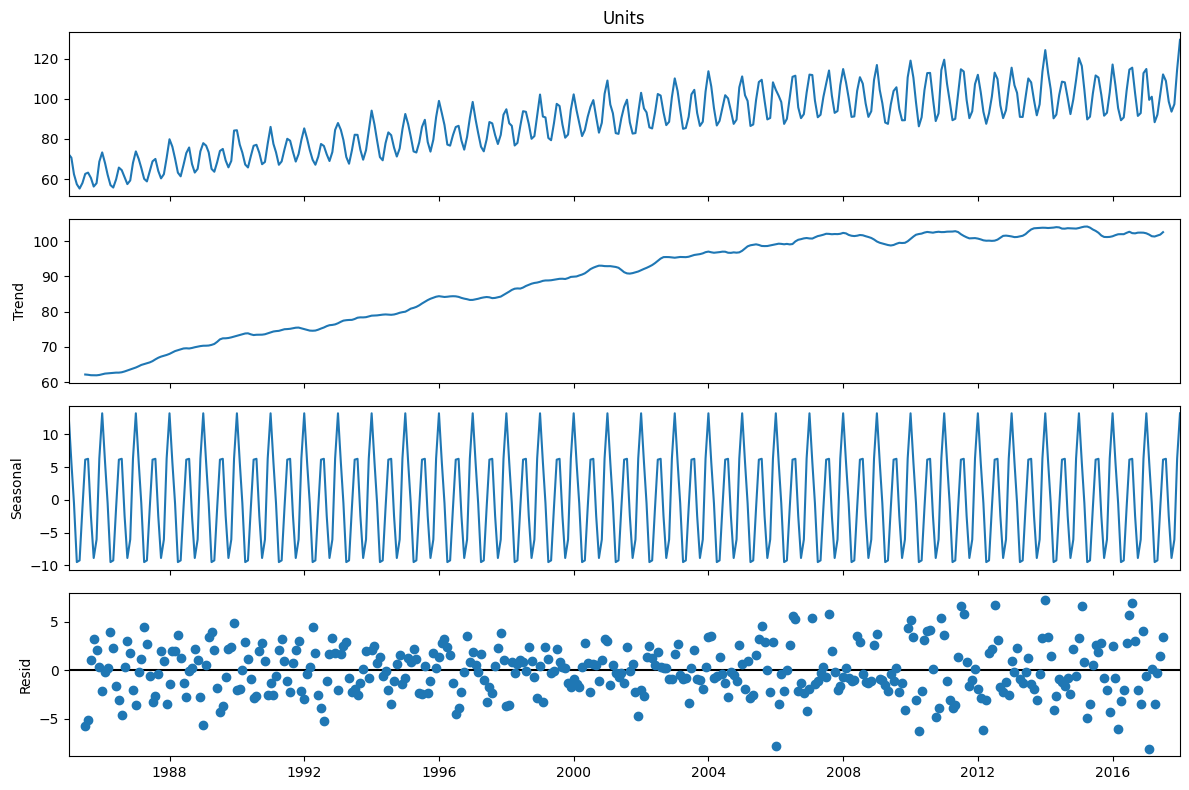

In [107]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(x=eledf['Units'], model='additive', period=12)
decomposition.plot()
plt.show()

In [108]:
from statsmodels.tsa.stattools import adfuller

def adfTest(df):
    res = adfuller(df)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(res ,labels):
        print(label+' : '+str(value))

    if res[1] <= 0.05:
        print("Rejecting Null-hypothesis: the data IS stationary.")
    else:
        print("Accepting Null-hypothesis: the data is NOT stationary.")

In [109]:
adfTest(eledf)

ADF Test Statistic : -2.256990350047235
p-value : 0.1862146911658712
#Lags Used : 15
Number of Observations Used : 381
Accepting Null-hypothesis: the data is NOT stationary.


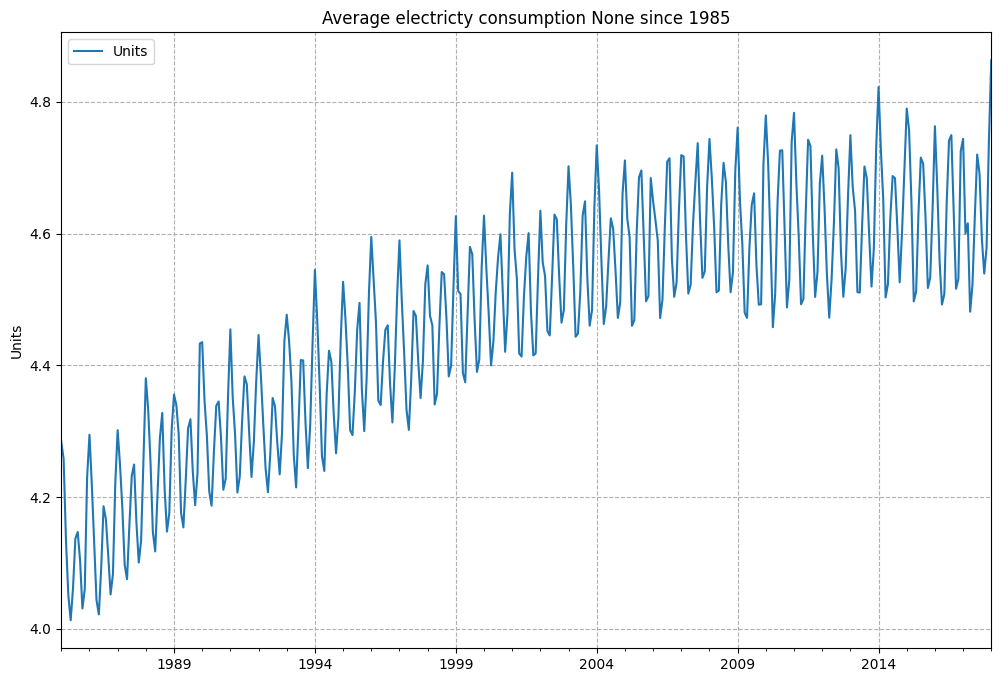

In [110]:
eledf_ls = np.log(eledf)
resample(eledf_ls, 'M')

In [111]:
adfTest(eledf_ls)

ADF Test Statistic : -3.14536042810772
p-value : 0.02337340103298579
#Lags Used : 15
Number of Observations Used : 381
Rejecting Null-hypothesis: the data IS stationary.


In [112]:
def statTest(df2):

  # determining rolling statistics
  movavg = df2.rolling(window=12).mean()
  movstd = df2.rolling(window=12).std()

  # plotting rolling statistics
  plt.title('Rolling Mean & Standard Deviation')
  plt.plot(df2, label='Initial timeseries')
  plt.plot(movavg, color='r', label='Rolling Mean')
  plt.plot(movstd, color='black', label='Rolling Standard Deviation')
  plt.legend(loc='best')
  plt.grid(True, linestyle='--')
  plt.show()

  # Adfuller-test
  adfTest(df2)

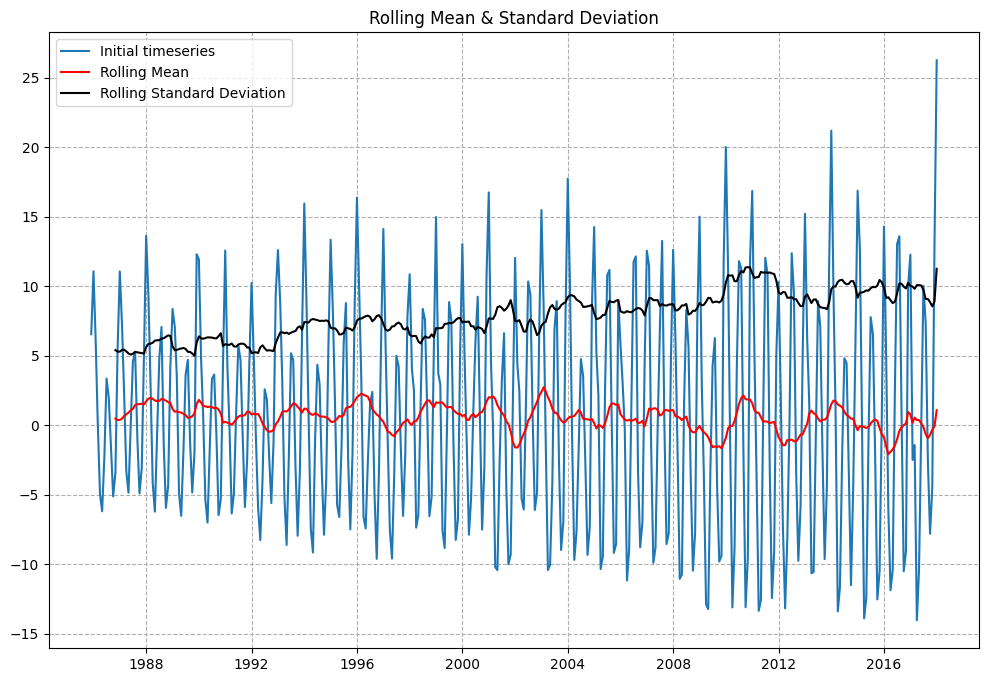

ADF Test Statistic : -5.6180851418673505
p-value : 1.16192894816841e-06
#Lags Used : 15
Number of Observations Used : 370
Rejecting Null-hypothesis: the data IS stationary.


In [113]:
eledf_ma = (eledf['Units'] - eledf['Units'].rolling(window=12).mean()).dropna()

statTest(eledf_ma)

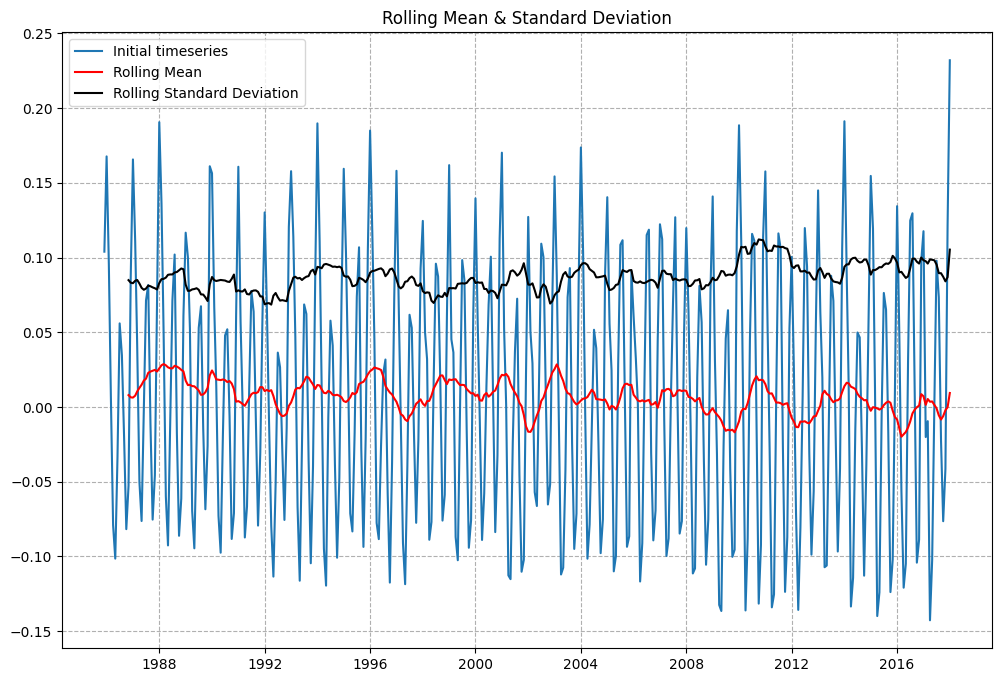

ADF Test Statistic : -5.2115861853654355
p-value : 8.32563975994627e-06
#Lags Used : 15
Number of Observations Used : 370
Rejecting Null-hypothesis: the data IS stationary.


In [114]:
eledf_ls_ma = (eledf_ls['Units'] - eledf_ls['Units'].rolling(window=12).mean()).dropna()

statTest(eledf_ls_ma)

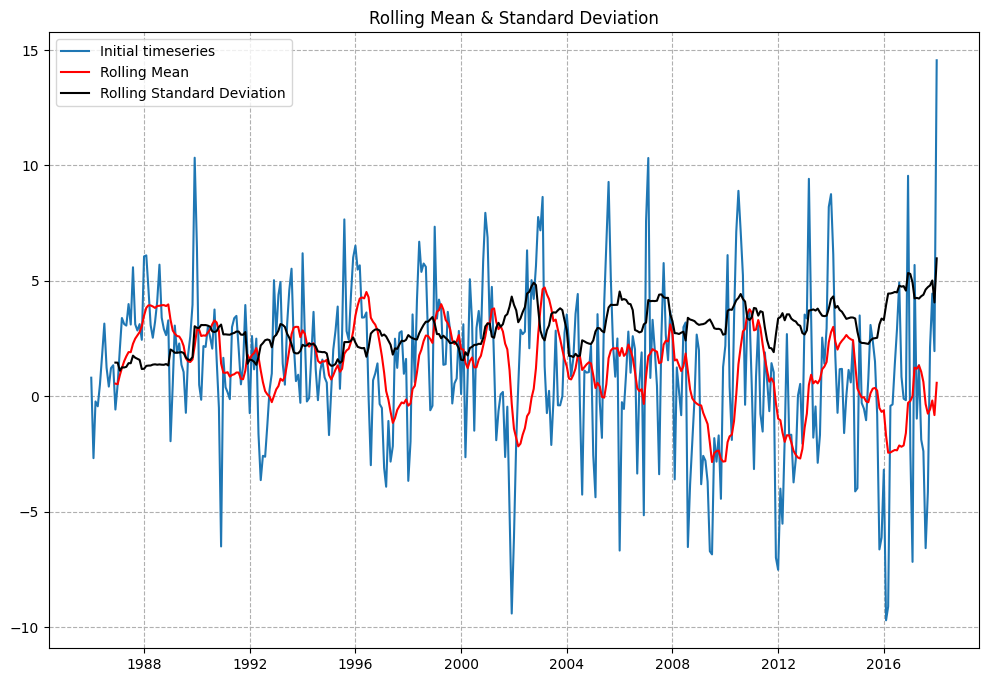

ADF Test Statistic : -5.673482023381762
p-value : 8.812644938088861e-07
#Lags Used : 12
Number of Observations Used : 372
Rejecting Null-hypothesis: the data IS stationary.


In [115]:
eledf_shift = (eledf['Units'] - eledf['Units'].shift(12)).dropna()

statTest(eledf_shift)

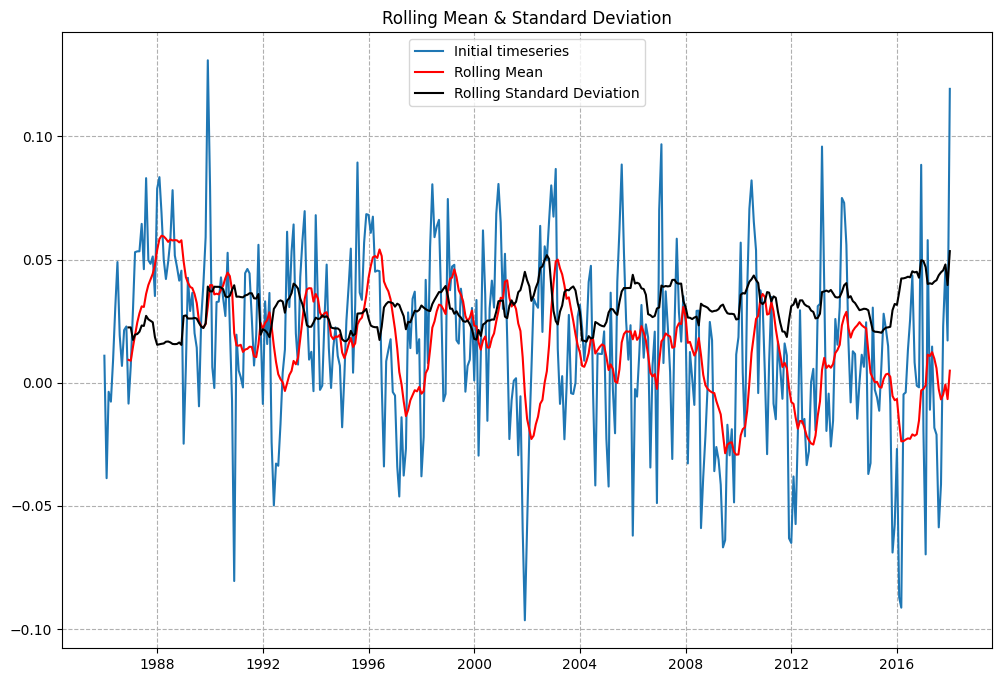

ADF Test Statistic : -5.204134819932942
p-value : 8.622788661526271e-06
#Lags Used : 12
Number of Observations Used : 372
Rejecting Null-hypothesis: the data IS stationary.


In [116]:
eledf_ls_shift = (eledf_ls['Units'] - eledf_ls['Units'].shift(12)).dropna()

statTest(eledf_ls_shift)

In [117]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

def acf_pacf_plot(df3):

  fig = plt.figure()
  ax1 = fig.add_subplot(211)
  fig = plot_acf(df3, lags=40,ax=ax1)
  ax2 = fig.add_subplot(212)
  fig = plot_pacf(df3, lags=40,ax=ax2)

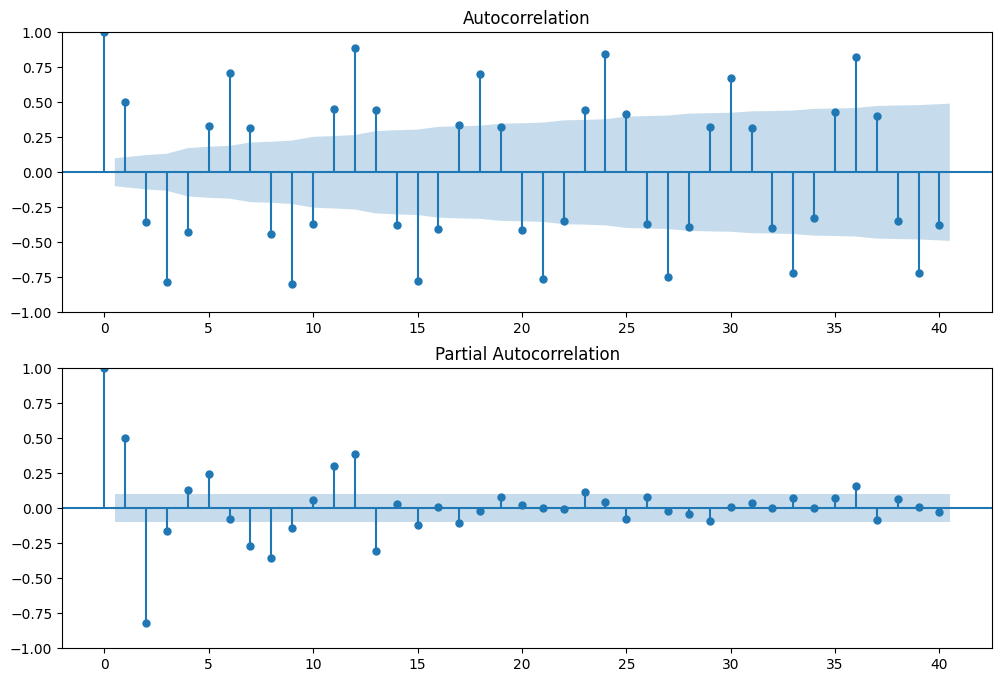

In [118]:
acf_pacf_plot(eledf_ls_ma)

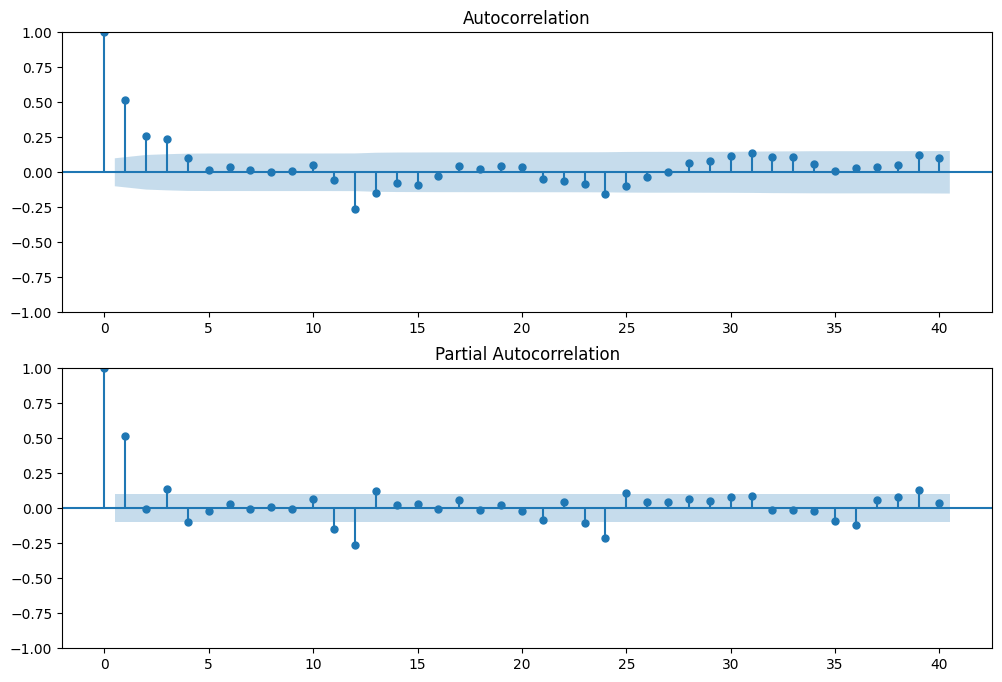

In [119]:
acf_pacf_plot(eledf_shift)

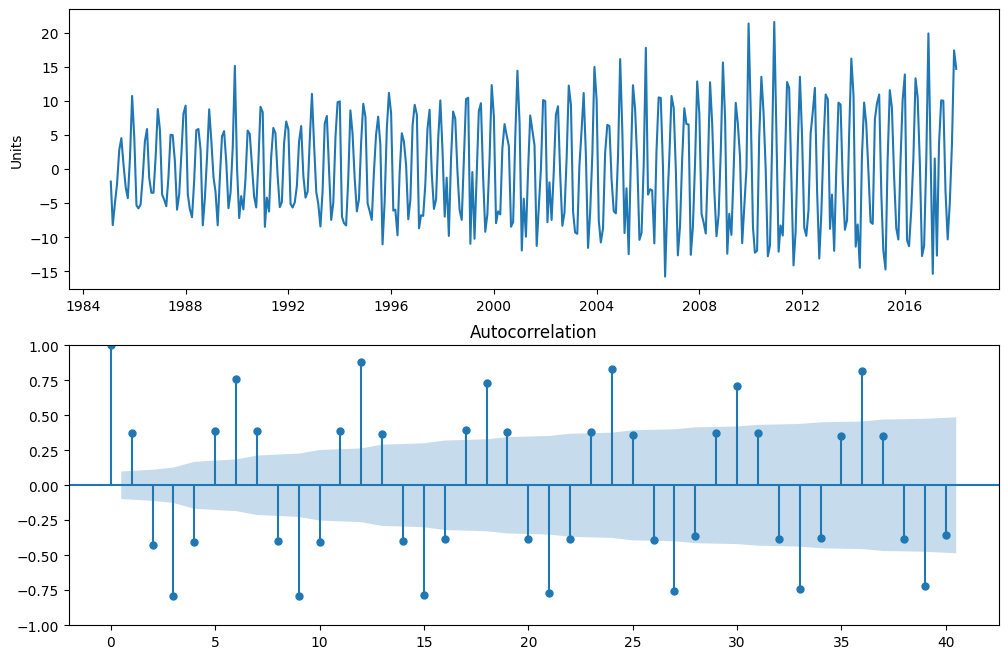

In [120]:
diff = eledf['Units'] - eledf['Units'].shift(1)
diff = diff.dropna(inplace = False)
fig = plt.figure()
fig1 = fig.add_subplot(211)
fig2 = fig.add_subplot(212)
date = eledf.index[1:]
sns.lineplot(x = date.tolist(), y = diff, ax = fig1)
plot_acf(diff, lags=40, ax = fig2)
plt.show()

In [121]:
from statsmodels.tsa.arima.model import ARIMA

In [122]:
ARmod = ARIMA(eledf['Units'], order = (1, 1, 1))
fitMod = ARmod.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [123]:
fitMod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Units   No. Observations:                  397
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1308.795
Date:                Wed, 30 Aug 2023   AIC                           2623.589
Time:                        10:20:28   BIC                           2635.533
Sample:                    01-01-1985   HQIC                          2628.321
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0732      0.091      0.805      0.421      -0.105       0.251
ma.L1          0.5450      0.070      7.737      0.000       0.407       0.683
sigma2        43.4248      3.296     13.175      0.000      36.965      49.885
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 1.44
Prob(Q):                              0.72   Prob(JB):                         0.49
Heteroskedasticity (H):               2.97   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='DATE'>

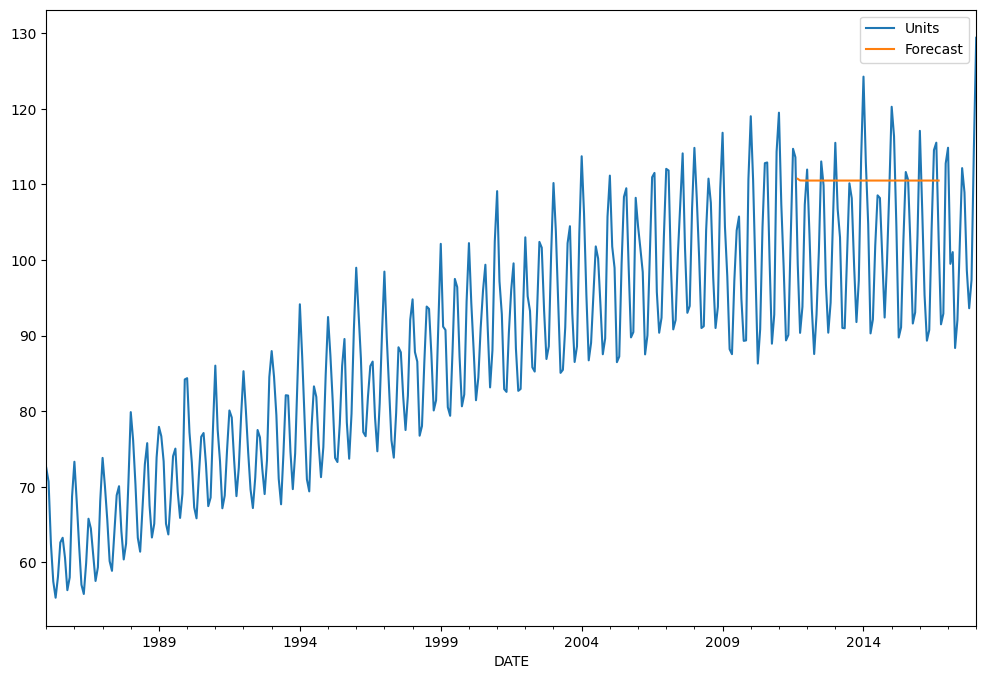

In [124]:
eledf['Forecast'] = fitMod.predict(start = 320, end = 380, dynamic = True)
eledf[['Units', 'Forecast']].plot()

In [125]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [126]:
SMmod = SARIMAX(eledf['Units'], order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
res = SMmod.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='DATE'>

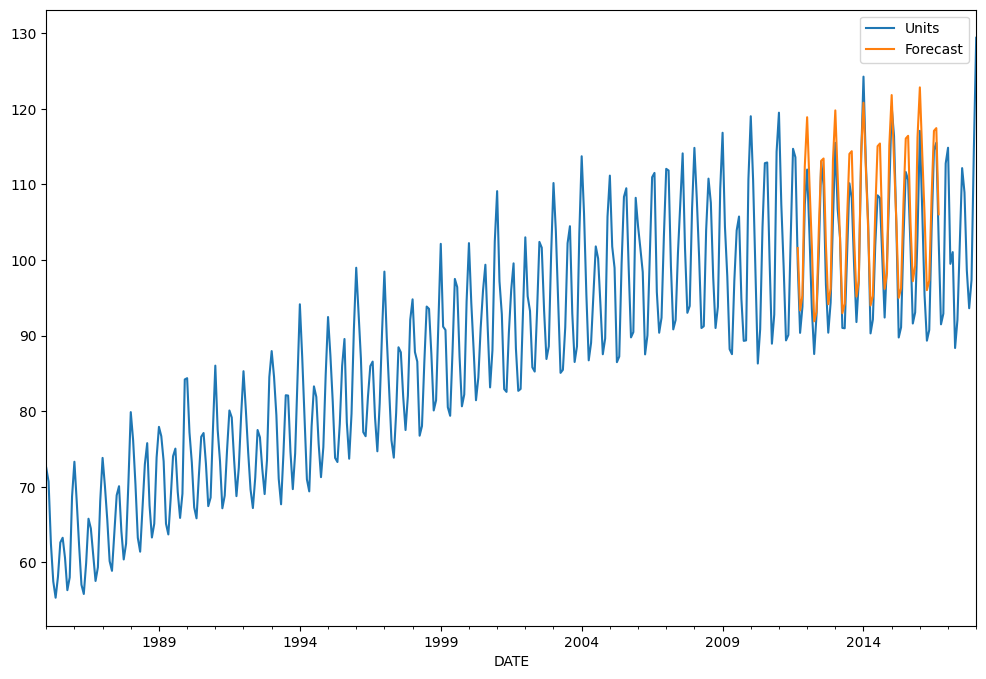

In [127]:
eledf['Forecast'] = res.predict(start = 320, end = 380, dynamic = True)
eledf[['Units', 'Forecast']].plot()

In [128]:
from pandas.tseries.offsets import DateOffset
newDates = [eledf.index[-1] + DateOffset(months = x) for x in range(0, 28)]

In [129]:
newDateDf = pd.DataFrame(index = newDates[1:], columns = eledf.columns)

In [130]:
newDateDf.tail(10)

,Units,Forecast
2019-07-01,NaN,NaN
2019-08-01,NaN,NaN
2019-09-01,NaN,NaN
2019-10-01,NaN,NaN
2019-11-01,NaN,NaN
2019-12-01,NaN,NaN
2020-01-01,NaN,NaN
2020-02-01,NaN,NaN
2020-03-01,NaN,NaN
2020-04-01,NaN,NaN


In [131]:
newDf = pd.concat([eledf, newDateDf])

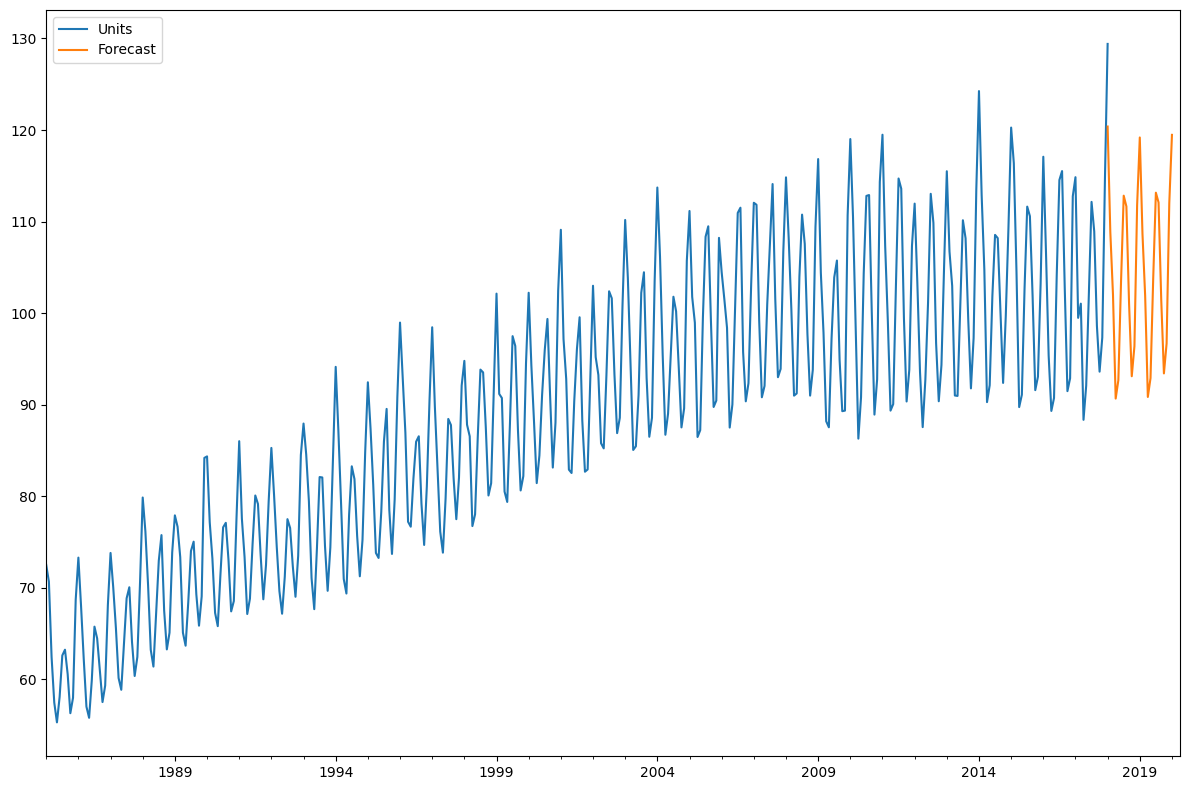

In [133]:
newDf['Forecast'] = res.predict(start = 396, end = 420, dynamic = True)
newDf[['Units', 'Forecast']].plot()
plt.tight_layout()